#### Import modules and read csv

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### CountVectorizer for text classification

In [16]:
# Create a series to store the labels: y
y = df['label']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],y,test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


#### Inspecting the vectors

In [17]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print('Count Vectorizer\n',count_df.head())

# Print the head of tfidf_df
print('Tfidf Vectorizer\n',tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(tfidf_df.columns) - set(count_df.columns)
print('Difference between 2 Dataframe\n',difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


c:\Users\cvalley\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Count Vectorizer
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
Tfidf Vectorizer
     00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       

#### Training and testing the "fake news" model with CountVectorizer

In [6]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
print(cm)


0.893352462936394
[[ 865  143]
 [  80 1003]]


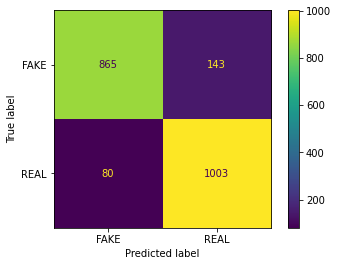

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FAKE','REAL'])
cm_display.plot()
plt.show()

#### Improving the model

In [8]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.8847441415590627

Alpha:  0.1
Score:  0.8928742228598756

Alpha:  0.2
Score:  0.8923959827833573

Alpha:  0.30000000000000004
Score:  0.893352462936394

Alpha:  0.4


c:\Users\cvalley\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Score:  0.893352462936394

Alpha:  0.5
Score:  0.8943089430894309

Alpha:  0.6000000000000001
Score:  0.8938307030129125

Alpha:  0.7000000000000001
Score:  0.8928742228598756

Alpha:  0.8
Score:  0.8928742228598756

Alpha:  0.9
Score:  0.8928742228598756



#### Model with best alpha and it's Metrices (Score and Confusion matrix)

In [9]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.4)

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
print(cm)


0.893352462936394
[[873 135]
 [ 88 995]]


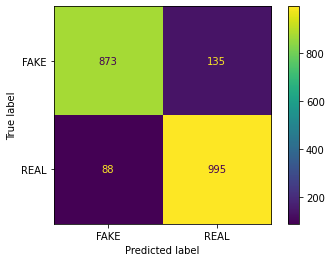

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FAKE','REAL'])
cm_display.plot()
plt.show()